## •	Kishore Nagarajan

## •	Task 1

## •	To predict a score of a student who studies for 9.25hrs/day

## •	Prediction using supervised ML


In [16]:
##importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## importing the dataset

In [6]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("The data is loaded")
df.head(10)

The data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## lets analyse the data

In [7]:
df.shape

(25, 2)

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()
# this is basically discriptive statistics analysis

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
df.isnull()
#if for a larger data set df.isnull().sum()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## visualizing our data

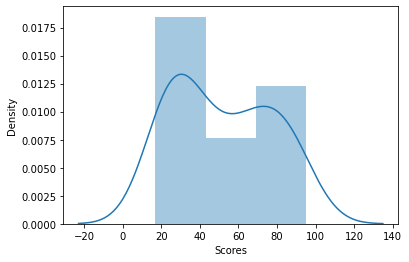

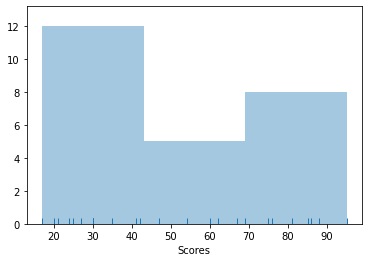

In [31]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde = False,rug = True)
plt.show()

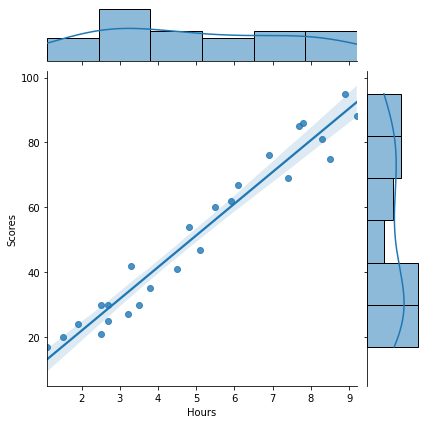

In [35]:
from scipy.stats import spearmanr
sns.jointplot(df["Hours"], df["Scores"], kind = "reg")
plt.show()
y= stats.pearsonr(df["Hours"],df["Scores"])


In [29]:
x = stats.pearsonr(df["Hours"],df["Scores"])
x
#shows strong linear relationship as if hours increases scores increase as well
#highly correlated

(0.9761906560220884, 9.132624467460325e-17)

## visualizing how much scores and hours are correlated to each other

Text(0.5, 1.0, 'Regression line')

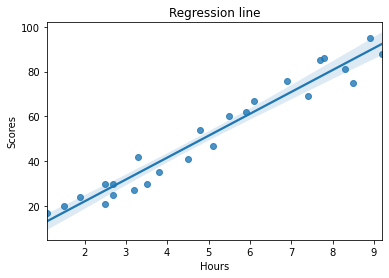

In [39]:
sns.regplot(df["Hours"], df["Scores"],df) #y is the dependent variable
plt.title('Regression line')

#straight line is the predicted score and the dots are the actual points

In [59]:
X = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [61]:
df1 = pd.DataFrame({'Actual' : Y_test,'Predicted_score' : y_pred})
df1

,Actual,Predicted_score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## visualizing actual and predicted scores

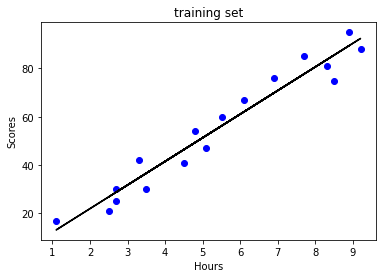

In [66]:
#plot the training set  
plt.scatter(X_train,Y_train,color = "blue")
plt.plot(X_train,model.predict(X_train),color = "black")
plt.title("training set")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


In [67]:
X_train,Y_train

(array([[6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
       dtype=int64))

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error =', mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error= ", mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error = 4.4197278080276545
Mean Squared Error=  22.96509721270044
Root Mean Squared Error=  4.792191274636316


In [83]:
# Defining variable 'y' with given data
p = np.array([[9.25]])
# Predicting on the basis of the value in 'y'
pred_y = model.predict(p)
pred_y

array([92.91505723])

In [85]:
print('The score obtained after studying for {} hours = {}'.format(p[0], pred_y[0]))

The score obtained after studying for [9.25] hours = 92.91505723477056


## Thus the task to predict the scores for the student studying for 9.25hrs is predicted by       linear regression